In [20]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.optimizers import Adam 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers.schedules import ExponentialDecay 
import cv2 
import numpy as np
import os
import shutil
from glob import glob
from sklearn.metrics import f1_score

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'db_for_cnn_2/train',
    color_mode="grayscale",
    seed=42,
    image_size=(224,224),
    batch_size=64
)

Found 211500 files belonging to 2 classes.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'db_for_cnn_2/dev',
    color_mode="grayscale",
    seed=42,
    image_size=(224,224),
    batch_size=64
)

Found 39780 files belonging to 2 classes.


In [23]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'db_for_cnn_2/test',
    seed=42,
    color_mode="grayscale",
    image_size=(224,224),
    batch_size=64
)

Found 39840 files belonging to 2 classes.


In [24]:
class_names = train_ds.class_names

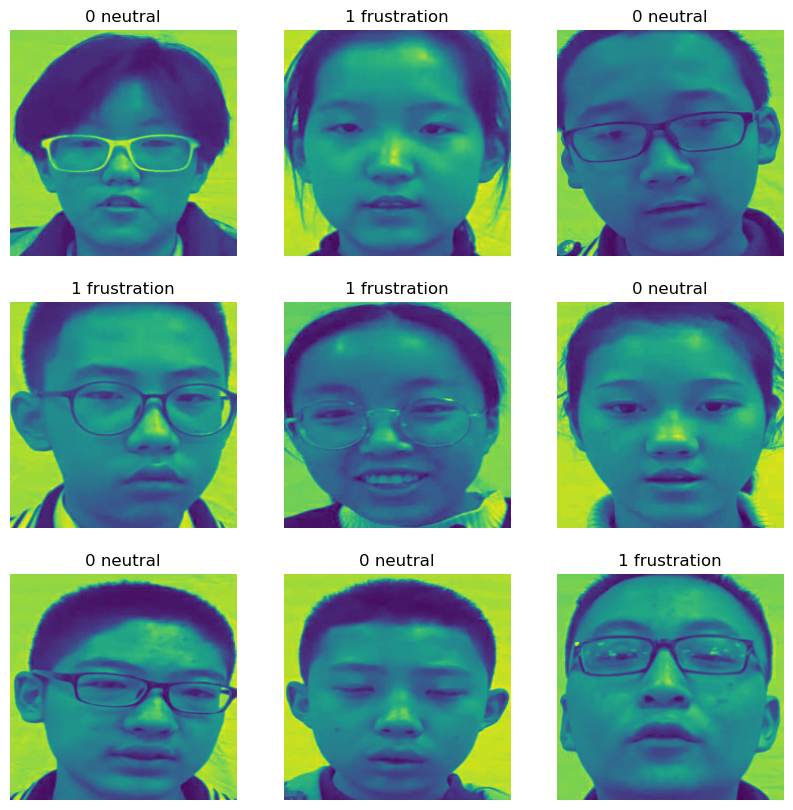

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
# validation_generator = validation_data_gen.flow_from_directory(
#     'db_for_cnn_2/dev',
#     target_size=(224,224),
#     batch_size=64,
#     color_mode="grayscale",
#     class_mode="categorical"
# )

Found 39780 images belonging to 2 classes.


In [18]:
# test_generator = test_data_gen.flow_from_directory(
#     'db_for_cnn_2/test',
#     target_size=(224,224),
#     batch_size=64,
#     color_mode="grayscale",
#     class_mode="categorical"
# )

Found 39840 images belonging to 2 classes.


Indices para las clases de Train



In [9]:
# class_indices = train_generator.class_indices
# print('Train classes:', class_indices)

Train classes: {'0 neutral': 0, '1 frustration': 1}


Indices para las clases de Test



In [10]:
# class_indices = test_generator.class_indices
# print('Test classes:', class_indices)

Test classes: {'0 neutral': 0, '1 frustration': 1}


Indices para las clases de Validation


In [11]:
# class_indices = validation_generator.class_indices
# print('Val classes:', class_indices)

Val classes: {'0 neutral': 0, '1 frustration': 1}


In [26]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 1)
(64,)


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [29]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(224, 224, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding="same",activation="relu"),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 224, 224, 1)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 16)      160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 32)       

In [45]:
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
# from tensorflow.keras.optimizers import Adam


# model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(64,activation="relu"))
# model.add(Dense(2,activation="softmax"))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 224, 224, 1)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 16)      160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 32)       

In [31]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit( 
        train_ds, 
        epochs=10, 
        validation_data=val_ds)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_3/conv2d_12/Relu' defined at (most recent call last):
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\bl4ck\AppData\Local\Temp\ipykernel_13964\3852699270.py", line 1, in <module>
      history = model.fit_generator(
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_3/conv2d_12/Relu'
OOM when allocating tensor with shape[64,112,112,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sequential_3/conv2d_12/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2285]

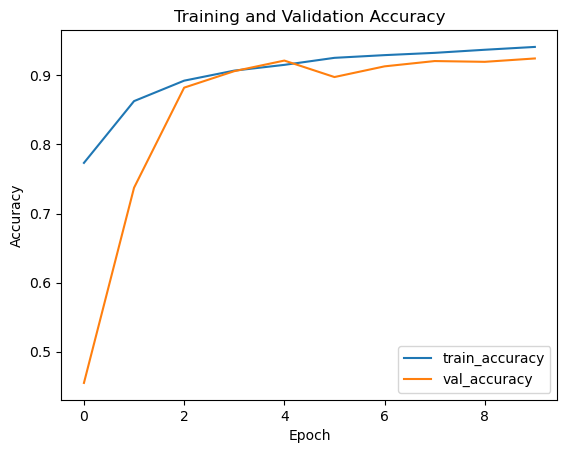

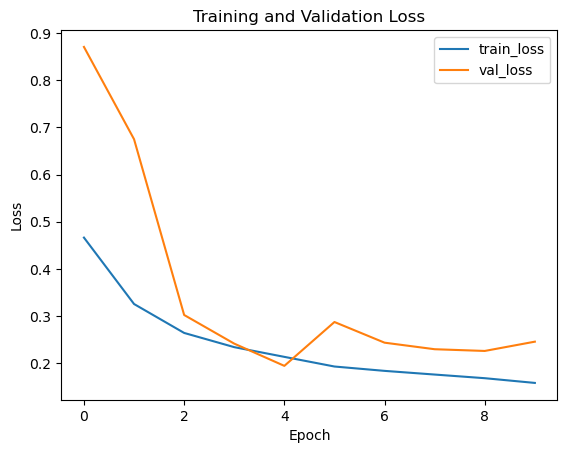

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
model.save('cnn-1.h5')

In [28]:
test_pred_path = 'db_for_cnn_2/test/1 frustration/11_6_3-12-23.jpg'
image = cv2.imread(test_pred_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image_normalized = image / 255.0
image_batch = np.expand_dims(image_normalized, axis=0)

In [29]:
image_normalized.shape

(224, 224)

In [30]:
import tensorflow as tf

In [33]:
model = tf.keras.models.load_model('cnn-1.h5')

In [34]:
predictions = model.predict(image_batch)

1/1 [==============================] - 0s 97ms/step


In [35]:
predicted_class = np.argmax(predictions, axis=1)

In [36]:
print('Clase predicha:', predicted_class)

Clase predicha: [1]


In [38]:
train_generator.class_names

AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [ ]:
face_pred = "db_for_cnn_2/test/1 frustration/11_6_3-12-23.jpg"
face_path = tf.keras.utils.get_file('Frustration',origin=face_pred)
img = tf.keras.utils.load_img(
    face_path,target_size = (224,224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "La imagen probablemente coresponde a {} con una puntuación {:.2f}".format(class_names[np.argmax(score)],100*np.max(score)))
)

In [59]:
predictions = model.predict(test_generator)

623/623 [==============================] - 45s 73ms/step


In [60]:
predicted_labels = np.argmax(predictions, axis=1)

In [37]:
for i in range(len(predicted_labels)):
    print(f"Muestra {i+1}:")
    print("Predicción:", predicted_labels[i], "(", predictions[i][predicted_labels[i]], ")")
    print("Etiqueta real:", test_generator.labels[i])
    print()

NameError: name 'predicted_labels' is not defined

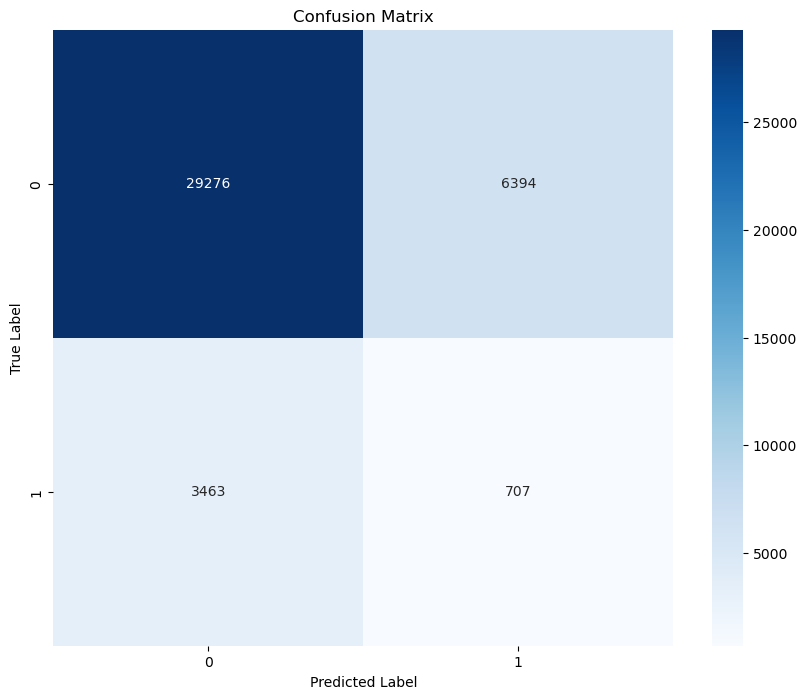

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
conf_matrix = confusion_matrix(a, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [65]:
a = test_generator.labels.astype('int64')

In [148]:
a

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [143]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
predicted_labels = (predictions > 0.5).astype(int).flatten()

In [70]:
f1 = f1_score(a, predicted_labels)
print(f'F1 Score: {f1}')

ValueError: Found input variables with inconsistent numbers of samples: [39840, 79680]